# Week 5 - Vector Space Model (VSM) and Topic Modeling

Over the next weeks, we are going to re-implement Sherin's algorithm and apply it to the text data we've been working on last week! Here's our roadmap:

**Week 6 - vectorization and linear algebra**
6. Dampen: weight the frequency of words (1 + log[count])
7. Scale: Normalize weighted frequency of words
8. Direction: compute deviation vectors

**Week 7 - Clustering**
9. apply different unsupervised machine learning algorithms
    * figure out how many clusters we want to keep
    * inspect the results of the clustering algorithm

**Week 8 - Visualizing the results**
10. create visualizations to compare documents

# WEEK 5 - DATA CLEANING

## Step 1 - Data Retrieval

In [1]:
# using glob, find all the text files in the "Papers" folder
import glob

files = glob.glob('./Papers/*.txt')
print(files)

['./Papers/paper12.txt', './Papers/paper5.txt', './Papers/paper4.txt', './Papers/paper13.txt', './Papers/paper11.txt', './Papers/paper6.txt', './Papers/paper7.txt', './Papers/paper10.txt', './Papers/paper14.txt', './Papers/paper3.txt', './Papers/paper2.txt', './Papers/paper15.txt', './Papers/paper0.txt', './Papers/paper1.txt', './Papers/paper16.txt', './Papers/paper9.txt', './Papers/paper8.txt']


In [2]:
# get all the data from the text files into the "documents" list
# P.S. make sure you use the 'utf-8' encoding
documents = []

for filename in files: 
    with open (filename, "r", encoding='utf-8') as f:
        documents.append(f.read())

In [3]:
# print the first 1000 characters of the first document to see what it 
# looks like (we'll use this as a sanity check below)
documents[0][:1500]

'103\n\n\x0cepistemic network analysis and topic modeling for chat\ndata from collaborative learning environment\nzhiqiang cai\n\nbrendan eagan\n\nnia m. dowell\n\nthe university of memphis\n365 innovation drive, suite 410\nmemphis, tn, usa\n\nuniversity of wisconsin-madison\n1025 west johnson street\nmadison, wi, usa\n\nthe university of memphis\n365 innovation drive, suite 410\nmemphis, tn, usa\n\nzcai@memphis.edu\n\neaganb@gmail.com\n\nniadowell@gmail.com\n\njames w. pennebaker\n\ndavid w. shaffer\n\narthur c. graesser\n\nuniversity of texas-austin\n116 inner campus dr stop g6000\naustin, tx, usa\n\nuniversity of wisconsin-madison\n1025 west johnson street\nmadison, wi, usa\n\nthe university of memphis\n365 innovation drive, suite 403\nmemphis, tn, usa\n\npennebaker@utexas.edu\n\ndws@education.wisc.edu\n\nart.graesser@gmail.com\n\nabstract\nthis study investigates a possible way to analyze chat data from\ncollaborative learning environments using epistemic network\nanalysis and topi

## Step 2 - Data Cleaning

In [4]:
# only select the text that's between the first occurence of the 
# the word "abstract" and the last occurence of the word "reference"
# Optional: print the length of the string before and after, as a 
# sanity check
# HINT: https://stackoverflow.com/questions/14496006/finding-last-occurrence-of-substring-in-string-replacing-that
# read more about rfind: https://www.tutorialspoint.com/python/string_rfind.htm

for i,doc in enumerate(documents):
    print(len(documents[i]), end=' ')
    # only keep the text after the abstract
    doc = doc[doc.index('abstract'):doc.rfind('reference')]
    # save the result
    documents[i] = doc
    # print the length of the resulting string
    print(len(documents[i]))
    
# one liner:
# documents = [doc[doc.index('abstract'):doc.rfind('reference')] for doc in documents]

40387 34778
37214 32762
44037 40032
45258 42251
32277 28206
47851 41302
42617 35102
49177 42621
40655 32734
47377 42978
46761 42253
31574 28134
50043 39318
41110 35514
42046 37649
47845 44059
45724 39947


In [5]:
# replace carriage returns (i.e., "\n") with a white space
# check that the result looks okay by printing the 
# first 1000 characters of the 1st doc:

documents = [doc.replace('\n', ' ') for doc in documents]
print(documents[0][:1000])

abstract this study investigates a possible way to analyze chat data from collaborative learning environments using epistemic network analysis and topic modeling. a 300-topic general topic model built from tasa (touchstone applied science associates) corpus was used in this study. 300 topic scores for each of the 15,670 utterances in our chat data were computed. seven relevant topics were selected based on the total document scores. while the aggregated topic scores had some power in predicting students’ learning, using epistemic network analysis enables assessing the data from a different angle. the results showed that the topic score based epistemic networks between low gain students and high gain students were significantly different (𝑡 = 2.00). overall, the results suggest these two analytical approaches provide complementary information and afford new insights into the processes related to successful collaborative interactions.  keywords chat; collaborative learning; topic modelin

In [6]:
# replace the punctation below by a white space
# check that the result looks okay 
# (e.g., by print the first 1000 characters of the 1st doc)

punctuation = ['.', '...', '!', '#', '"', '%', '$', "'", '&', ')', 
               '(', '+', '*', '-', ',', '/', '.', ';', ':', '=', 
               '<', '?', '>', '@', '",', '".', '[', ']', '\\', ',',
               '_', '^', '`', '{', '}', '|', '~', '−', '”', '“', '’']


# remove ponctuation
for i,doc in enumerate(documents): 
    for punc in punctuation: 
        doc = doc.replace(punc, ' ')
    documents[i] = doc
    
print(documents[0][:1000])

abstract this study investigates a possible way to analyze chat data from collaborative learning environments using epistemic network analysis and topic modeling  a 300 topic general topic model built from tasa  touchstone applied science associates  corpus was used in this study  300 topic scores for each of the 15 670 utterances in our chat data were computed  seven relevant topics were selected based on the total document scores  while the aggregated topic scores had some power in predicting students  learning  using epistemic network analysis enables assessing the data from a different angle  the results showed that the topic score based epistemic networks between low gain students and high gain students were significantly different  𝑡   2 00   overall  the results suggest these two analytical approaches provide complementary information and afford new insights into the processes related to successful collaborative interactions   keywords chat  collaborative learning  topic modelin

In [7]:
# remove numbers by either a white space or the word "number"
# again, print the first 1000 characters of the first document
# to check that you're doing the right thing
for i,doc in enumerate(documents): 
    for num in range(10):
        doc = doc.replace(str(num), '')
    documents[i] = doc

print(documents[1][:1000])

abstract there is a critical need to develop new educational technology applications that analyze the data collected by universities to ensure that students graduate in a timely fashion   to  years   and they are well prepared for jobs in their respective fields of study  in this paper  we present a novel approach for analyzing historical educational records from a large  public university to perform next term grade prediction  i e   to estimate the grades that a student will get in a course that he she will enroll in the next term  accurate next term grade prediction holds the promise for better student degree planning  personalized advising and automated interventions to ensure that students stay on track in their chosen degree program and graduate on time  we present a factorization based approach called matrix factorization with temporal course wise influence that incorporates course wise influence effects and temporal effects for grade prediction  in this model  students and cours

In [8]:
# Remove the stop words below from our documents
# print the first 1000 characters of the first document
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 
              'ourselves', 'you', 'your', 'yours', 'yourself', 
              'yourselves', 'he', 'him', 'his', 'himself', 'she', 
              'her', 'hers', 'herself', 'it', 'its', 'itself', 
              'they', 'them', 'their', 'theirs', 'themselves', 
              'what', 'which', 'who', 'whom', 'this', 'that', 
              'these', 'those', 'am', 'is', 'are', 'was', 'were', 
              'be', 'been', 'being', 'have', 'has', 'had', 'having', 
              'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 
              'but', 'if', 'or', 'because', 'as', 'until', 'while', 
              'of', 'at', 'by', 'for', 'with', 'about', 'against', 
              'between', 'into', 'through', 'during', 'before', 
              'after', 'above', 'below', 'to', 'from', 'up', 'down', 
              'in', 'out', 'on', 'off', 'over', 'under', 'again', 
              'further', 'then', 'once', 'here', 'there', 'when', 
              'where', 'why', 'how', 'all', 'any', 'both', 'each', 
              'few', 'more', 'most', 'other', 'some', 'such', 'no', 
              'nor', 'not', 'only', 'own', 'same', 'so', 'than', 
              'too', 'very', 's', 't', 'can', 'will', 
              'just', 'don', 'should', 'now']


# remove stop words
for i,doc in enumerate(documents):
    for stop_word in stop_words:
        doc = doc.replace(' ' + stop_word + ' ', ' ')
    documents[i] = doc

print(documents[0][:1000])

abstract study investigates possible way analyze chat data collaborative learning environments using epistemic network analysis topic modeling   topic general topic model built tasa  touchstone applied science associates  corpus used study   topic scores   utterances chat data computed  seven relevant topics selected based total document scores  aggregated topic scores power predicting students  learning  using epistemic network analysis enables assessing data different angle  results showed topic score based epistemic networks low gain students high gain students significantly different  𝑡       overall  results suggest two analytical approaches provide complementary information afford new insights processes related successful collaborative interactions   keywords chat  collaborative learning  topic modeling  epistemic network analysis    introduction collaborative learning special form learning interaction affords opportunities groups students combine cognitive resources synchronousl

In [9]:
# remove words with one and two characters (e.g., 'd', 'er', etc.)
# print the first 1000 characters of the first document

for i,doc in enumerate(documents):  
    doc = [x for x in doc.split() if len(x) > 2]
    doc = " ".join(doc)
    documents[i] = doc

print(documents[0][:1000])

abstract study investigates possible way analyze chat data collaborative learning environments using epistemic network analysis topic modeling topic general topic model built tasa touchstone applied science associates corpus used study topic scores utterances chat data computed seven relevant topics selected based total document scores aggregated topic scores power predicting students learning using epistemic network analysis enables assessing data different angle results showed topic score based epistemic networks low gain students high gain students significantly different overall results suggest two analytical approaches provide complementary information afford new insights processes related successful collaborative interactions keywords chat collaborative learning topic modeling epistemic network analysis introduction collaborative learning special form learning interaction affords opportunities groups students combine cognitive resources synchronously asynchronously participate ta


### Putting it all together

In [10]:
# package all of your work above into a function that cleans a given document

def clean_list_of_documents(documents):
    
    cleaned_docs = []

    for i,doc in enumerate(documents):
        # only keep the text after the abstract
        doc = doc[doc.index('abstract'):]
        # only keep the text before the references
        doc = doc[:doc.rfind('reference')]
        # replace return carriage with white space
        doc = doc.replace('\n', ' ')
        # remove ponctuation
        for punc in punctuation: 
            doc = doc.replace(punc, ' ')
        # remove numbers
        for i in range(10):
            doc = doc.replace(str(i), ' ')
        # remove stop words
        for stop_word in stop_words:
            doc = doc.replace(' ' + stop_word + ' ', ' ')
        # remove single characters and stem the words 
        doc = [x for x in doc.split() if len(x) > 2]
        doc = " ".join(doc)
        # save the result to our list of documents
        cleaned_docs.append(doc)
        
    return cleaned_docs

In [11]:
# reimport your raw data
documents = []

for filename in files: 
    with open (filename, "r", encoding='utf-8') as f:
        documents.append(f.read())
        
# clean your files using the function above
docs = clean_list_of_documents(documents)

# print the first 1000 characters of the first document
print(docs[0][:1000])

abstract study investigates possible way analyze chat data collaborative learning environments using epistemic network analysis topic modeling topic general topic model built tasa touchstone applied science associates corpus used study topic scores utterances chat data computed seven relevant topics selected based total document scores aggregated topic scores power predicting students learning using epistemic network analysis enables assessing data different angle results showed topic score based epistemic networks low gain students high gain students significantly different overall results suggest two analytical approaches provide complementary information afford new insights processes related successful collaborative interactions keywords chat collaborative learning topic modeling epistemic network analysis introduction collaborative learning special form learning interaction affords opportunities groups students combine cognitive resources synchronously asynchronously participate ta

## Step 3 - Build your list of vocabulary

This list of words (i.e., the vocabulary) is going to become the columns of your matrix.

In [12]:
import math
import numpy as np

In [13]:
# create a function that takes in a list of documents
# and returns a set of unique words. Make sure that you
# sort the list alphabetically before returning it. 

def get_vocabulary(docs):
    voc = []
    for doc in docs:
        for word in doc.split():
            if word not in voc: 
                voc.append(word)
    voc = list(set(voc))
    voc.sort()
    return voc

# Then print the length of your vocabulary (it should be 
# around 5500 words)
vocabulary = get_vocabulary(docs)
print(len(vocabulary))

5676


## Step 4 - transform your documents in to 100-words chunks

In [14]:
# create a function that takes in a list of documents
# and returns a list of 100-words chunk 
# (with a 25 words overlap between them)
# Optional: add two arguments, one for the number of words
# in each chunk, and one for the overlap

def flatten_and_overlap(docs, window_size=100, overlap=25):
    
    # create the list of overlapping documents
    new_list_of_documents = []
    
    # flatten everything into one string
    flat = ""
    for doc in docs:
        flat += doc
    
    # split into words
    flat = flat.split()

    # create chunks of 100 words
    high = window_size
    while high < len(flat):
        low = high - window_size
        new_list_of_documents.append(flat[low:high])
        high += overlap
    return new_list_of_documents

chunks = flatten_and_overlap(docs)

In [15]:
# create a for loop to double check that each chunk has 
# a length of 100
# Optional: use assert to do this check
for chunk in chunks: 
    assert(len(chunk) == 100)

# WEEK 6 - VECTOR MANIPULATION

## Step 5 - Create a word by document matrix

In [16]:
# 1) create an empty dataframe using pandas
# the number of rows should be the number of chunks we have
# the number of columns should be size of the vocabulary
import pandas as pd
df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2219 entries, 0 to 2218
Columns: 5676 entries,    to 𝟎𝟒𝟕
dtypes: int64(5676)
memory usage: 96.1 MB


In [17]:
# 2) fill out the dataframe with the count of words for each document
# (use two for loops to iterate through the documents and the vocabulary)
for i,chunk in enumerate(chunks):
    for word in chunk:
        if word in df.columns: 
            df.loc[i,word] += 1

In [18]:
# 3) Sanity check: make sure that your counts are correct
# (e.g., if you know that a words appears often in a document, check that
# the number is also high in your dataframe; and vice-versa for low counts)
df.loc[0,'wandering']

0

In [19]:
# 4) Putting it together: create a function that takes a list of documents
# and a vocabulary as arguments, and returns a dataframe with the counts
# of words: 
def docs_by_words_df(chunks, vocabulary):
    df = pd.DataFrame(0, index=np.arange(len(chunks)), columns=vocabulary)
    
    # fill out the matrix with counts
    for i,chunk in enumerate(chunks):
        for word in chunk:
            if word in df.columns: 
                df.loc[i,word] += 1
            
    return df

# call the function and check that the resulting dataframe is correct
df = docs_by_words_df(chunks, vocabulary)
df.loc[0,'wandering']

0

## Step 6 - Weight word frequency

In [20]:
# 5) create a function that adds one to the current cell and takes its log
# IF the value in the cell is not zero
def one_plus_log(cell):
    if cell != 0: 
        return 1 + math.log(cell)
    else:
        return 0

In [21]:
# 6) use the "applymap" function of the dataframe to apply the function 
# above to each cell of the table
df_log = df.applymap(one_plus_log)

In [22]:
# 7) check that the numbers in the resulting matrix look accurate;
# print the value before and after applying the function above
print("before one + log: ", df.loc[0,'wandering'])
print("after one + log: ", 1 + math.log(df.loc[0,'wandering']))
print("Value in the dataframe: ", df_log.loc[0,'wandering'])

before one + log:  0


ValueError: math domain error

## Step 7 - Matrix normalization

In [23]:
# 8) look at the image below; why do you think that we need to normalize our 
# data before clustering in this particular case? 

<img src="https://i.stack.imgur.com/N2unM.png" />

In general, it's common practice to normalize your data before clustering - so that variables are comparable.

In [24]:
# 9) describe how the min-max normalization works:

<img src="https://docs.microsoft.com/en-us/azure/machine-learning/studio-module-reference/media/aml-normalization-minmax.png" />

In [25]:
# 10) describe how normalizing using a z-score works:

<img src="https://cdn-images-1.medium.com/max/1600/1*13XKCXQc7eabfZbRzkvGvA.gif"/>

In [26]:
# 11) describe how normalizing to unit norm works

Resources: 
* https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.Normalizer.html#sklearn.preprocessing.Normalizer
* http://mathworld.wolfram.com/NormalVector.html

We are going to work with some pre-made normalization functions from sklearn (feel free to skim this page):
* https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [27]:
# 12) since we are working with vectors, apply the Normalizer from 
# sklearn.preprocessing to our dataframe. Print a few values 
# before and after to make sure you've applied the normalization
from sklearn.preprocessing import Normalizer

scaler = Normalizer()
df_log[df_log.columns] = scaler.fit_transform(df_log[df_log.columns])
df_log[df_log.columns[500:600]]

,become,becomes,becoming,been,beep,began,begin,beginning,begins,behave,...,boy,boyce,boyd,boys,brain,branch,branched,branches,branching,brands
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
# 13) create a function that takes a dataframe as argument and where a second
# argument is the type of normalization (MinMaxScaler, Normalizer, StandardScaler)
# and returns the normalized dataframe
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler

def normalize_df(df, method='Normalizer'):
    
    # choose the normalization strategy
    scaler = None
    if method == 'Normalizer': scaler = Normalizer()
    if method == 'MinMaxScaler': scaler = MinMaxScaler()
    if method == 'StandardScaler': scaler = StandardScaler()
        
    # apply the normalization
    if scaler != None:
        df[df.columns] = scaler.fit_transform(df[df.columns])

    # return the resulting dataframe
    return df

## Step 8 - Deviation Vectors

<img src="https://www.dropbox.com/s/9f73r7pk7bi7vh9/deviation_vectors.png?dl=1" />

In [29]:
# 14) compute the sum of the vectors
v_sum = np.sum(df_log.values, axis=0)

In [30]:
# 15) normalize the vector (find its average)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

v_avg = length_norm(v_sum)

In [31]:
# 16) take each vector and subtract its components along v_avg

matrix = df_log.values

for row in range(df_log.shape[0]):

    # this is one vector (row
    v_i = matrix[row,:]

    # we subtract its component along v_average
    scalar = np.dot(v_i,v_avg)
    sub = v_avg * scalar

    # we replace the row by the deviation vector
    matrix[row,:] = length_norm(v_i - sub)

In [32]:
# 17) put the code above in a function that takes in a dataframe as an argument
# and computes deviation vectors of each row (=document)
def vector_length(u):
    return np.sqrt(np.dot(u, u))

def length_norm(u):
    return u / vector_length(u)

def transform_deviation_vectors(df):
    
    # get the numpy matrix from the df
    matrix = df.values
    
    # compute the sum of the vectors
    v_sum = np.sum(matrix, axis=0)
    
    # normalize this vector (find its average)
    v_avg = length_norm(v_sum)
    
    # we iterate through each vector
    for row in range(df_log.shape[0]):
        
        # this is one vector (row
        v_i = matrix[row,:]
        
        # we subtract its component along v_average
        scalar = np.dot(v_i,v_avg)
        sub = v_avg * scalar
        
        # we replace the row by the deviation vector
        matrix[row,:] = length_norm(v_i - sub)
    
    return df

In [33]:
df = transform_deviation_vectors(df_log)

# WEEK 7 - CLUSTERING

## Step 9 - Clustering

### Figuring out how many clusters we should pick

1) Plot the inertia of kmeans using this example from datacamp: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/clustering-for-dataset-exploration?ex=6

In [34]:
# 1a) create a list of inertia values for k 1-10

from sklearn.cluster import KMeans

ks = range(1, 11)
inertias = []

for k in ks:
    model = KMeans(n_clusters=k)
    model.fit(df)
    inertias.append(model.inertia_)

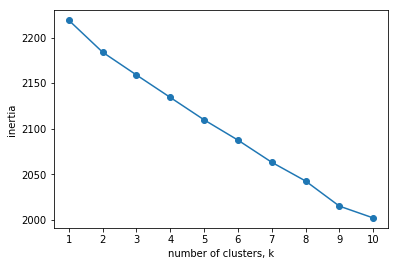

In [35]:
# 1b) plot the inertia values using matplotlib

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

1c) What can you conclude from the elbow method?

The inertia measurement does not give us information on the optimum number of clusters.

2) Visualize your data using T-SNE
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=11
* https://www.datacamp.com/community/tutorials/introduction-t-sne


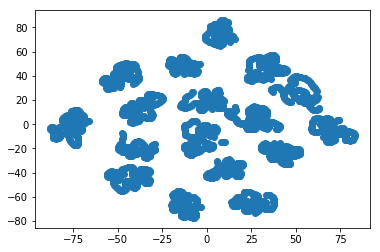

In [36]:
# 2a) plot the T-SNE graph using a learning rate of 200

from sklearn.manifold import TSNE

model = TSNE(learning_rate=200)

tsne_features = model.fit_transform(df)

xs = tsne_features[:,0]
ys = tsne_features[:,1]

plt.scatter(xs, ys)
plt.show()

2b) What can you conclude from T-SNE?

There are 17 clusters, which corresponds to the 17 papers.

Note: T-SNE is great, but there is also some controversy on how much you should trust this algorithm:
* [Shortcomings of T-SNE](https://stats.stackexchange.com/questions/270391/should-dimensionality-reduction-for-visualization-be-considered-a-closed-probl)
* [Limitations of T-SNE](https://stats.stackexchange.com/questions/263539/clustering-on-the-output-of-t-sne)

### Kmeans

In [37]:
# 3a) apply k-means to our data with k=10 and print the first 10 words
# that are the most associated with each cluster centroids
# Hint: look at the cluster_centers_ of the KMeans object to find the centroids

from sklearn.cluster import KMeans

model = KMeans(n_clusters=10)
model.fit(df)
centroids = model.cluster_centers_

centroids_words = [[] for i in range(len(centroids))]

for i in range(0,len(centroids)):
    for j in range(1,11):
        n = np.argsort(centroids[i])[-j]
        centroids_words[i].append(df.columns[n])

for i in range(0,len(centroids)):
    print(i,centroids_words[i])

0 ['estimates', 'student', 'iafm', 'parameter', 'individualized', 'rate', 'ibkt', 'parameters', 'datasets', 'chapter']
1 ['similarity', 'item', 'items', 'data', 'measures', 'similarities', 'pearson', 'answers', 'measure', 'clustering']
2 ['word', 'mind', 'wandering', 'reading', 'models', 'task', 'text', 'film', 'semantic', 'model']
3 ['prompts', 'compliance', 'metatutor', 'page', 'srl', 'subgoal', 'learning', 'prompt', 'current', 'students']
4 ['replay', 'level', 'objective', 'pass', 'game', 'students', 'math', 'elective', 'attempts', 'group']
5 ['learner', 'learning', 'questions', 'learners', 'question', 'engagement', 'video', 'course', 'model', 'outcomes']
6 ['solvers', 'solving', 'foldit', 'problem', 'behavior', 'solution', 'solver', 'patterns', 'work', 'performing']
7 ['course', 'recommendation', 'courses', 'methods', 'sequential', 'recommender', 'threads', 'matrix', 'context', 'factorization']
8 ['data', 'feature', 'classification', 'set', 'encoder', 'auto', 'embeddings', 'sae', '

3b) interpret the cluster above; do they make sense to you?
    
    Cluster 0 deals with parameter estimates of individual student.
    Cluster 1 deals with measures/items/answers that are similar in nature. 
    Cluster 2 deals with semantic models for reading.

### Hierarchical clustering

4) use hierarchical clustering on the data; feel free to refer to the datacamp lesson below: 
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/visualization-with-hierarchical-clustering-and-t-sne?ex=3

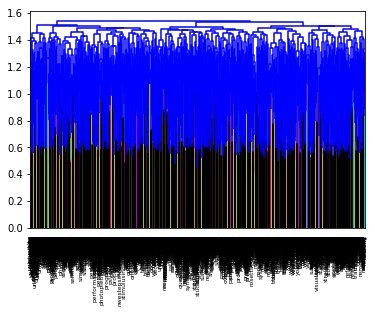

In [38]:
#4a) plot the dendogram using the link above (method = complete)

from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
%matplotlib inline

mergings = linkage(df, method='complete')

dendrogram(mergings,
           labels=df.columns,
           leaf_rotation=90,
           leaf_font_size=6)
plt.show()

4b) was the dendodram useful?

The dendrogram was not useful as there are too many clusters and hence it is difficult to decide which level of clustering is appropriate.

In [39]:
#4c) we are going to use agglomerative clustering here 
# from the sklean library 

from sklearn.cluster import AgglomerativeClustering

clustering = AgglomerativeClustering(n_clusters=6).fit(df)

In [40]:
# 4d) compute the center of the cluster
# unfortunately sklearn doesn't provide you with the centroids, but you can use the link below:
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestCentroid.html

from sklearn.neighbors.nearest_centroid import NearestCentroid

clf = NearestCentroid()
clf.fit(df, clustering.labels_)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [41]:
# 4e) print the top 10 words for each cluster centroid

centroids_words_a = [[] for i in range(6)]

for i in range(0,6):
    for j in range(1,11):
        n = np.argsort(clf.centroids_[i])[-j]
        centroids_words_a[i].append(df.columns[n])

for i in range(0,6):
    print(i,centroids_words_a[i])

0 ['task', 'data', 'estimates', 'mind', 'wandering', 'reading', 'film', 'feature', 'models', 'rate']
1 ['course', 'word', 'model', 'words', 'topic', 'term', 'semantic', 'learner', 'question', 'prediction']
2 ['solvers', 'solving', 'foldit', 'problem', 'solution', 'behavior', 'solver', 'patterns', 'work', 'data']
3 ['similarity', 'item', 'items', 'data', 'measures', 'similarities', 'pearson', 'answers', 'measure', 'clustering']
4 ['students', 'replay', 'math', 'messages', 'test', 'pre', 'induced', 'rules', 'level', 'group']
5 ['prompts', 'compliance', 'metatutor', 'page', 'srl', 'subgoal', 'learning', 'prompt', 'current', 'students']


4f) interpret the cluster above; do they make sense to you?

Cluster 0 deals with estimates/models/feature of reading.

Cluster 1 deals with semantics of a topic/course/term/question.

Cluster 2 deals with problem solving.

### DBScan 

5) Use DBscan (with epsilon=5, min_samples=10) to cluster your data

In [42]:
# 5a) apply DBScan on your data
# Hint: https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=1, min_samples=10).fit(df)
n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

In [43]:
# 5b) find the cluster centroid (using the code from question 4d)

from sklearn.neighbors.nearest_centroid import NearestCentroid

clf_db = NearestCentroid()
clf_db.fit(df, db.labels_)

NearestCentroid(metric='euclidean', shrink_threshold=None)

In [44]:
# 5c) print the top ten words

centroids_words_db = [[] for i in range(n_clusters_)]

for i in range(0,n_clusters_):
    for j in range(1,11):
        n = np.argsort(clf_db.centroids_[i])[-j]
        centroids_words_db[i].append(df.columns[n])

for i in range(0,n_clusters_):
    print(i,centroids_words_db[i])

0 ['learning', 'data', 'work', 'knowledge', 'based', 'used', 'use', 'study', 'student', 'learners']
1 ['pass', 'level', 'attempts', 'attempt', 'performance', 'division', 'prior', 'ers', 'features', 'play']
2 ['group', 'level', 'base', 'pass', 'replayed', 'pre', 'replay', 'students', 'test', 'passing']
3 ['test', 'post', 'induced', 'group', 'policy', 'full', 'scores', 'random', 'two', 'showed']
4 ['messages', 'mindset', 'failure', 'students', 'success', 'growth', 'problems', 'tend', 'time', 'less']
5 ['narrative', 'film', 'scientific', 'text', 'dataset', 'recall', 'classifier', 'precision', 'model', 'table']
6 ['subgoal', 'prompts', 'compliance', 'current', 'page', 'well', 'table', 'recommend', 'processes', 'explicit']
7 ['pearson', 'similarity', 'data', 'measures', 'czech', 'results', 'measure', 'second', 'garden', 'clustering']
8 ['pretest', 'estimates', 'gains', 'chapter', 'posttest', 'student', 'scores', 'ability', 'rate', 'slope']
9 ['word', 'score', 'similarity', 'cosine', 'vec', 

5d) How many clusters do you have? Do they make sense to you? Interpret them below. 

There are 10 clusters.

Cluster 0 deals with acquistion of learning/knowledge by student/learners.

Cluster 1 deals with attempts at passing or performance.

Cluster 2 deals with passing in students' test.

### NMF

6) Use NMF to find topics in our dataset
* https://campus.datacamp.com/courses/unsupervised-learning-in-python/discovering-interpretable-features?ex=3

In [45]:
# create new df with no negative values
df_new = normalize_df(df, method='MinMaxScaler')

In [46]:
# 6a) Use the code above to apply the NMF model
from sklearn.decomposition import NMF

model = NMF(n_components=6)
model.fit(df_new)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
  n_components=6, random_state=None, shuffle=False, solver='cd',
  tol=0.0001, verbose=0)

In [47]:
# 6b) print the top ten words of each component

centroids_words_nmf = [[] for i in range(6)]

for i in range(0,6):
    for j in range(1,11):
        n = np.argsort(model.components_[i])[-j]
        centroids_words_nmf[i].append(df.columns[n])

for i in range(0,6):
    print(i,centroids_words_nmf[i])

0 ['data', 'item', 'based', 'model', 'similarity', 'items', 'using', 'knowledge', 'different', 'learning']
1 ['solving', 'problem', 'foldit', 'solvers', 'behavior', 'data', 'work', 'learning', 'students', 'solution']
2 ['students', 'table', 'scores', 'test', 'post', 'different', 'pre', 'student', 'two', 'group']
3 ['learning', 'students', 'prompts', 'compliance', 'reading', 'mind', 'wandering', 'related', 'metatutor', 'page']
4 ['data', 'feature', 'set', 'used', 'models', 'using', 'training', 'model', 'performance', 'features']
5 ['student', 'estimates', 'individualized', 'model', 'parameter', 'iafm', 'models', 'learning', 'rate', 'ibkt']


6c) Interpret the cluster above; how do they compare to kmeans, hierarchical clustering and DBscan?

Cluster 0 deals with items/knowledge that are similar or different in nature.

Cluster 1 deals with problem solving.

Cluster 2 deals with students' scores in pre or post test.

KMeans generates different set of results everytime due to the random initial assignment of centroids.

It is easier to derive meaning for the clusters in DBscan and NMF as compared to KMeans and hierarchical clustering.

## Step 10 - Visualizing the results

## Final Step - Putting it all together: 

In [ ]:
# in python code, our goal is to recreate the steps above as functions
# so that we can just one line to run topic modeling on a list of 
# documents: 
def ExtractTopicsVSM(documents, numTopics):
    ''' this functions takes in a list of documents (strings), 
        runs topic modeling (as implemented by Sherin, 2013)
        and returns the clustering results, the matrix used 
        for clustering a visualization '''
    
    # step 2: clean up the documents
    documents = clean_list_of_documents(documents)
    
    # step 3: let's build the vocabulary of these docs
    vocabulary = get_vocabulary(documents)
    
    # step 4: we build our list of 100-words overlapping fragments
    documents = flatten_and_overlap(documents)
    
    # step 5: we convert the chunks into a matrix
    matrix = docs_by_words_matrix(documents, vocabulary)
    
    # step 6: we weight the frequency of words (count = 1 + log(count))
    matrix = one_plus_log_mat(matrix, documents, vocabulary)
    
    # step 7: we normalize the matrix
    matrix = normalize(matrix)
    
    # step 8: we compute deviation vectors
    matrix = transform_deviation_vectors(matrix, documents)
    
    # step 9: we apply a clustering algorithm to find topics
    results_clustering = cluster_matrix(matrix)
    
    # step 10: we create a visualization of the topics
    visualization = visualize_clusters(results_clustering, vocabulary)
    
    # finally, we return the clustering results, the matrix, and a visualization
    return results_clustering, matrix, visualization